In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import torch

In [2]:
performance_data = pd.read_csv("../results/batch3/training_log.csv").set_index("epoch").drop("index", axis = 1)
performance_data.head()

,train_loss,valid_loss,mask_train_loss,mask_test_loss,learning_rate
epoch,,,,,
0,0.887601,0.595679,0.887601,0.595679,1.410565e-07
1,0.647355,0.482759,0.647355,0.482759,1.410565e-07
2,0.560743,0.427140,0.560743,0.427140,1.410565e-07
3,0.514309,0.439765,0.514309,0.439765,1.410565e-07
4,0.544247,0.422550,0.544247,0.422550,1.410565e-07


[Text(0, 0.5, 'loss')]

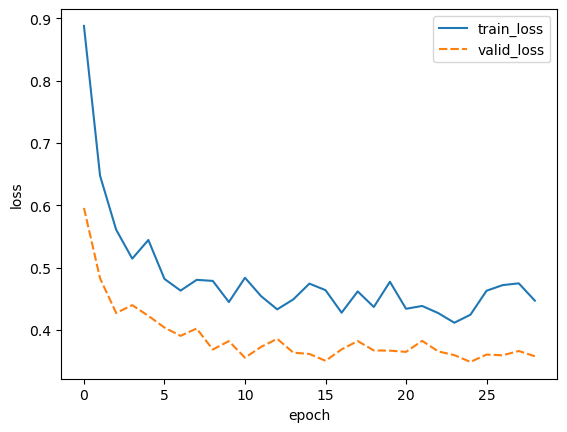

In [3]:
sns.lineplot(data = performance_data[["train_loss", "valid_loss"]]).set(ylabel = "loss")

In [6]:
echo_data = pd.read_csv("../results/echo3/holodecml.csv").set_index("number")

In [7]:
echo_data.head()

,value,datetime_start,datetime_complete,duration,params_encoder_name,params_learning_rate,params_lookahead,params_mode,params_model_name,params_train_batch_size,params_training_loss,params_weight_decay,state
number,,,,,,,,,,,,,
0,0.998928,2023-07-18 13:18:26.053657,2023-07-18 18:05:31.398798,0 days 04:47:05.345141,efficientnet-b0,0.003592,3,255,pan,3,lovasz-hinge,6.633993e-05,COMPLETE
1,NaN,2023-07-18 13:18:26.139369,2023-07-18 13:18:28.526480,0 days 00:00:02.387111,vgg11,0.000062,2,norm,deeplabv3,13,focal,4.236227e-10,PRUNED
2,0.174610,2023-07-18 13:18:27.388768,2023-07-19 04:07:36.013614,0 days 14:49:08.624846,dpn68,0.000276,2,sym,unet++,10,tyversky,3.887803e-08,COMPLETE
3,NaN,2023-07-18 13:18:28.202328,2023-07-18 13:18:32.015200,0 days 00:00:03.812872,vgg11,0.000248,0,stan,pan,4,dice,2.169664e-09,PRUNED
4,0.999443,2023-07-18 13:18:28.202822,2023-07-18 22:34:23.298288,0 days 09:15:55.095466,dpn68,0.000070,2,norm,manet,14,lovasz-hinge,5.111737e-05,COMPLETE


In [14]:
echo_data.shape
echo_data.dropna(axis = 0)

,value,datetime_start,datetime_complete,duration,params_encoder_name,params_learning_rate,params_lookahead,params_mode,params_model_name,params_train_batch_size,params_training_loss,params_weight_decay,state
number,,,,,,,,,,,,,
0,0.998928,2023-07-18 13:18:26.053657,2023-07-18 18:05:31.398798,0 days 04:47:05.345141,efficientnet-b0,0.003592,3,255,pan,3,lovasz-hinge,6.633993e-05,COMPLETE
2,0.174610,2023-07-18 13:18:27.388768,2023-07-19 04:07:36.013614,0 days 14:49:08.624846,dpn68,0.000276,2,sym,unet++,10,tyversky,3.887803e-08,COMPLETE
4,0.999443,2023-07-18 13:18:28.202822,2023-07-18 22:34:23.298288,0 days 09:15:55.095466,dpn68,0.000070,2,norm,manet,14,lovasz-hinge,5.111737e-05,COMPLETE
5,0.998789,2023-07-18 13:18:28.202806,2023-07-19 01:48:20.713776,0 days 12:29:52.510970,xception,0.002371,3,norm,manet,9,tyversky,6.579885e-10,COMPLETE
6,0.999434,2023-07-18 13:18:29.137924,2023-07-19 00:57:21.851213,0 days 11:38:52.713289,resnet18,0.000769,1,norm,unet++,8,lovasz-hinge,8.776792e-08,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.131328,2023-07-21 12:48:30.661115,2023-07-22 03:19:30.140111,0 days 14:30:59.478996,mobilenet_v2,0.000616,0,stan,deeplabv3+,21,tyversky,2.227958e-07,COMPLETE
163,0.133253,2023-07-21 12:53:02.397474,2023-07-22 05:59:02.865624,0 days 17:06:00.468150,mobilenet_v2,0.000612,0,stan,deeplabv3+,21,tyversky,4.776477e-07,COMPLETE
164,0.117533,2023-07-21 13:07:51.615648,2023-07-22 01:42:20.412927,0 days 12:34:28.797279,mobilenet_v2,0.000626,0,sym,deeplabv3+,21,tyversky,2.802357e-07,COMPLETE


In [15]:
completion_rate = echo_data[["state"]].value_counts(normalize = True)

In [16]:
completion_rate.head()

state   
FAIL        0.484568
COMPLETE    0.388889
PRUNED      0.086420
RUNNING     0.040123
dtype: float64

[Text(0.5, 0, 'Validation Loss'),
 Text(0, 0.5, 'Models'),
 Text(0.5, 1.0, 'Distribution of Loss Values over ECHO-OPT')]

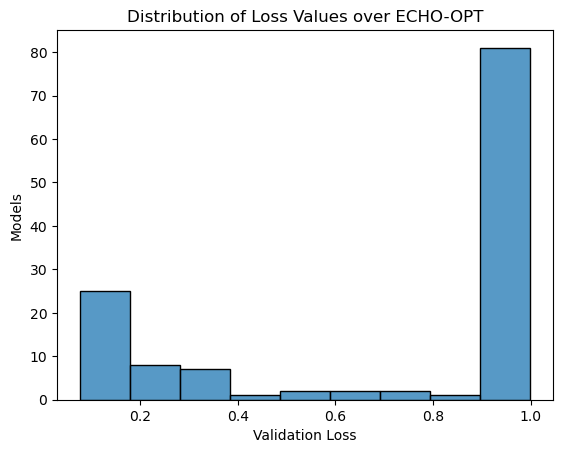

In [20]:
sns.histplot(data = echo_data, x = "value").set(xlabel = "Validation Loss", ylabel = "Models", title = "Distribution of Loss Values over ECHO-OPT")